## CSCS530 Winter 2015
#### Complex Systems 530 - Computer Modeling of Complex Systems (Winter 2015)

  * Course ID: CMPLXSYS 530
  * Course Title: Computer Modeling of Complex Systems
  * Term: Winter 2015
  * Schedule: Wednesdays and Friday, 1:00-2:30PM ET
  * Location: 120 West Hall (http://www.lsa.umich.edu/cscs/research/computerlab)
  * Teachers: [Mike Bommarito](https://www.linkedin.com/in/bommarito) and [Sarah Cherng](https://www.linkedin.com/pub/sarah-cherng/35/1b7/316)

#### [View this repository on NBViewer](http://nbviewer.ipython.org/github/mjbommar/cscs-530-w2015/tree/master/)


# Basic Networks

 In this notebook, we'll explore one of the most popular types of environments - a network.  In the cells below, we'll be creating a small-world network and simulating a disease outbreak.
 
 ### Imports

 In the import section below, you'll see an important new addition: __networkx__.  We'll be using __networkx__ as our preferred package for creating and managing network objects; we'll include links to more info and documentation in later cells.

In [98]:
%matplotlib inline

# Imports
import networkx as nx
import numpy
import matplotlib.pyplot as plt
import pandas

import seaborn; seaborn.set()

# Import widget methods
from IPython.html.widgets import *

## Initializing a network

  In some problems, we can define our own rules to _"grow"_ or _"generate"_ a network.  However, for many problems, we may want to re-use an existing methodology.  __networkx__ comes with a suite of methods to "sample" random graphs, such as:
  * Trees, e.g., balanced trees (networkx.balanced_tree)
  * Erdos-Renyi graphs (networkx.erdos_renyi_graph)
  * Watts-Strogatz small-world graphs (networkx.watts_strogatz_graph)
  * Bipartite graphs
  
  For a full list, see [this page on Graph Generators in the networkx documentation](https://networkx.github.io/documentation/latest/reference/generators.html).
  
  In the sample below, we'll create a Newman-Watts-Strogatz small-world graph and print some basic info about the graph.

In [99]:
# Create a random graph
nodes = 30
edges = 2
prob_out = 0.2
g = nx.newman_watts_strogatz_graph(nodes, edges, prob_out)
print((g.number_of_nodes(), g.number_of_edges()))

(30, 38)


## Visualizing a network

  As humans, we are wired for visuals; for networks, visualizations can provide an important first characterization that isn't apparent from simple statistics.
  
  In the cell below, we show how to calculate a "layout" for a network and visualize it using networkx.
  
  For more examples, see [the Drawing Graphs section of the NetworkX tutorial](https://networkx.github.io/documentation/latest/tutorial/tutorial.html#drawing-graphs).

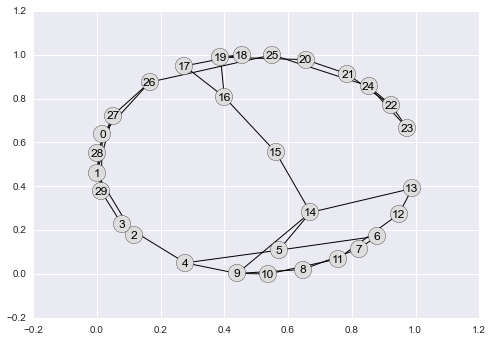

In [100]:
# Draw the random graph
g_layout = nx.spring_layout(g, iterations=1000)
nx.draw_networkx(g, pos=g_layout, node_color='#dddddd')

## Outbreak in a  network

  Next, we'll simulate a very simple outbreak in a network.  Our disease will start by infecting a random patient, then pass with probability 1 to any connected individuals.  
  
  To find the "connected" individuals, we'll need to learn how to find the neighbors of a node.  NetworkX makes this easy.

In [101]:
# Let's pick a node at random to infect
patient_zero = numpy.random.choice(g.nodes())
patient_zero

healthy_nodes = g.nodes()
healthy_nodes.remove(patient_zero)

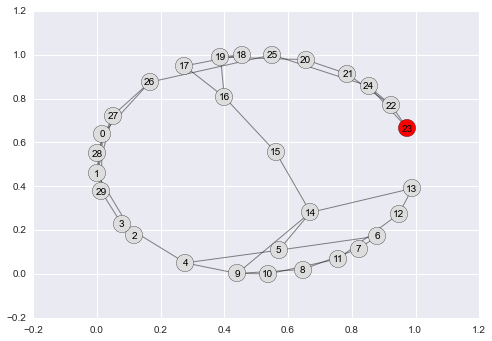

In [102]:
# Now we can visualize the infected node's position
f = plt.figure()
nx.draw_networkx_nodes(g, g_layout,
                       nodelist=[patient_zero],
                       node_color='red')

nx.draw_networkx_nodes(g, g_layout,
                       nodelist=healthy_nodes,
                       node_color='#dddddd')

nx.draw_networkx_edges(g, g_layout, 
                       width=1.0, 
                       alpha=0.5,
                       edge_color='#111111')

_ = nx.draw_networkx_labels(g, g_layout,
                        dict(zip(g.nodes(), g.nodes())),
                        font_size=10)


## First model step

  In our simple disease outbreak model, each step of the model consists of the following:

  * for each infected individual, find their neighbors
  * infect all neighbors
  
  For our first step, we start with a single infected person; in subsequent steps, we need to use a _for_ loop to handle all currently infected persons.

In [103]:
# Find patient zero's neighbors
neighbors = g.neighbors(patient_zero)
neighbors

# Let's infect all of his neighbors!
infected_patients = [patient_zero]
infected_patients.extend(neighbors)
infected_patients

# Remove the infected from healthy nodes
healthy_nodes = [node for node in healthy_nodes if node not in infected_patients]

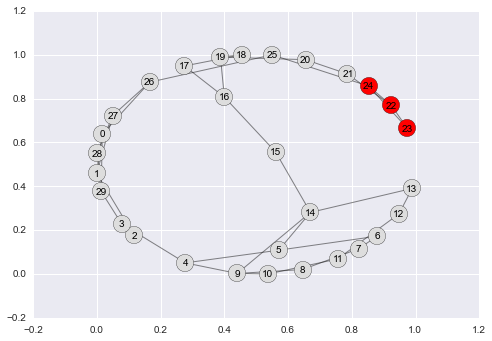

In [104]:
# Now we can visualize the infected node's position
f = plt.figure()
nx.draw_networkx_nodes(g, g_layout,
                       nodelist=infected_patients,
                       node_color='red')

nx.draw_networkx_nodes(g, g_layout,
                       nodelist=healthy_nodes,
                       node_color='#dddddd')

nx.draw_networkx_edges(g, g_layout, 
                       width=1.0, 
                       alpha=0.5,
                       edge_color='#111111')

_ = nx.draw_networkx_labels(g, g_layout,
                        dict(zip(g.nodes(), g.nodes())),
                        font_size=10)

## Second model step

  As mentioned above, we now need to use a _for_ loop over all individuals.

In [105]:
# Now let's infect the neighbors of all infected patients!
newly_infected = []
for infected_patient in infected_patients:
    # Find patient zero's neighbors
    neighbors = [neighbor for neighbor in g.neighbors(infected_patient) if neighbor not in infected_patients]
    newly_infected.extend(neighbors)

newly_infected

[25, 21]

In [106]:
# Update infected and healthy
infected_patients.extend(newly_infected)

# Remove the infected from healthy nodes
healthy_nodes = [node for node in healthy_nodes if node not in infected_patients]

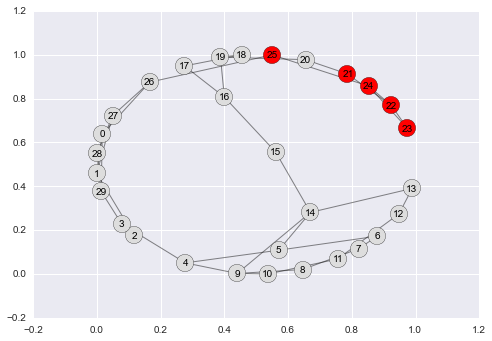

In [107]:
# Now we can visualize the infected node's position
f = plt.figure()
nx.draw_networkx_nodes(g, g_layout,
                       nodelist=infected_patients,
                       node_color='red')

nx.draw_networkx_nodes(g, g_layout,
                       nodelist=healthy_nodes,
                       node_color='#dddddd')

nx.draw_networkx_edges(g, g_layout, 
                       width=1.0, 
                       alpha=0.5,
                       edge_color='#111111')

_ = nx.draw_networkx_labels(g, g_layout,
                        dict(zip(g.nodes(), g.nodes())),
                        font_size=10)

## Running a few more steps

  Let's wrap our model step method in yet another _for_ loop, allowing us to simulate multiple steps of the model at once.

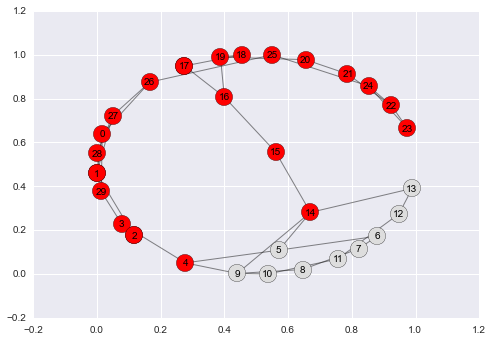

In [108]:
# Now let's infect the neighbors of all infected patients!
model_steps = 5

# Iterate over steps
for i in range(model_steps):
    # Iterate over infected
    newly_infected = []
    for infected_patient in infected_patients:
        # Find patient neighbors and infect
        neighbors = [neighbor for neighbor in g.neighbors(infected_patient) if neighbor not in infected_patients]
        newly_infected.extend(neighbors)
    
    # Remove the infected from healthy nodes
    infected_patients.extend(newly_infected)
    healthy_nodes = [node for node in healthy_nodes if node not in infected_patients]
    
    



# Now we can visualize the infected node's position
f = plt.figure()
nx.draw_networkx_nodes(g, g_layout,
                       nodelist=infected_patients,
                       node_color='red')

nx.draw_networkx_nodes(g, g_layout,
                       nodelist=healthy_nodes,
                       node_color='#dddddd')

nx.draw_networkx_edges(g, g_layout, 
                       width=1.0, 
                       alpha=0.5,
                       edge_color='#111111')

_ = nx.draw_networkx_labels(g, g_layout,
                        dict(zip(g.nodes(), g.nodes())),
                        font_size=10)